In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load file
clean_df2 = pd.read_csv('Grand_daddy.csv')
clean_df2

Unnamed: 0 Unique ID  Household region  Age of sample adult  \
0               0   H056808                 3                   50   
1               1   H018779                 3                   53   
2               2   H049265                 3                   56   
3               3   H007699                 3                   57   
4               4   H066034                 3                   25   
...           ...       ...               ...                  ...   
29477       29477   H012375                 4                   70   
29478       29478   H052160                 4                   35   
29479       29479   H051563                 4                   72   
29480       29480   H058432                 4                   58   
29481       29481   H052354                 4                   57   

       Sex of sample adult  Education of sample adult  \
0                        1                          1   
1                        1                          7   
2                        1                          8   
3                        2                          5   
4                        1                          4   
...                    ...                        ...   
29477                    2                          9   
29478                    2                          7   
29479                    2                          4   
29480                    1                          5   
29481                    2                          4   

       Hispanic ethnicity of SA  Single + Mult race gps w Hispanic origin  \
0                             2                                         2   
1                             2                                         3   
2                             2                                         2   
3                             2                                         2   
4                             2                                         3   
...                         ...                                       ...   
29477                         2                                         2   
29478                         1                                         1   
29479                         2                                         2   
29480                         2                                         2   
29481                         2                                         2   

       Hispanic origin detail  Single and multiple race groups  ...  \
0                           3                                1  ...   
1                           3                                2  ...   
2                           3                                1  ...   
3                           3                                1  ...   
4                           3                                2  ...   
...                       ...                              ...  ...   
29477                       3                                1  ...   
29478                       2                                8  ...   
29479                       3                                1  ...   
29480                       3                                1  ...   
29481                       3                                1  ...   

       Medicaid HDHP.1  Medicaid reassignment flag  \
0                  NaN                         NaN   
1                  NaN                         NaN   
2                  NaN                         NaN   
3                  NaN                         NaN   
4                  NaN                         NaN   
...                ...                         ...   
29477              NaN                         NaN   
29478              NaN                         NaN   
29479              NaN                         NaN   
29480              NaN                         NaN   
29481              NaN                         NaN   

       Paid for by Medicare - plan 1  Paid for by Medi

In [3]:
# columns in the df
clean_df2.columns

Index(['Unnamed: 0', 'Unique ID', 'Household region', 'Age of sample adult',
       'Sex of sample adult', 'Education of sample adult',
       'Hispanic ethnicity of SA', 'Single + Mult race gps w Hispanic origin',
       'Hispanic origin detail', 'Single and multiple race groups',
       'General health status', 'Ever had Diabetes?', 'Ever had pre-diabetes?',
       'Taking diabetic pills', 'Taking insuliin', 'Diabetes type',
       'Ever had weak/failing kidneys', 'Weight without shoes (pounds)',
       'Categorical Body Mass Index', 'Health insurance hierarchy under 65',
       'Health insurance hierarchy under 65.1', 'Type of Medicare coverage',
       'Enrolled in Medicare Advantage Plan', 'Medicare HMO',
       'Medicare Advantage Plan', 'Medicare Part D',
       'Medicaid through Marketplace ', 'Medicaid premium',
       'Medicaid deductible', 'Medicaid HDHP', 'Medicaid HDHP.1',
       'Medicaid reassignment flag', 'Paid for by Medicare - plan 1',
       'Paid for by Medicare - 

In [4]:
# null values for each columns
for column in clean_df2.columns:
    print( f'Column {column} has {clean_df2[column].isnull().sum()} null values.' )

Column Unnamed: 0 has 0 null values.
Column Unique ID has 0 null values.
Column Household region has 0 null values.
Column Age of sample adult has 0 null values.
Column Sex of sample adult has 0 null values.
Column Education of sample adult has 0 null values.
Column Hispanic ethnicity of SA has 0 null values.
Column Single + Mult race gps w Hispanic origin has 0 null values.
Column Hispanic origin detail has 0 null values.
Column Single and multiple race groups has 0 null values.
Column General health status has 0 null values.
Column Ever had Diabetes? has 0 null values.
Column Ever had pre-diabetes? has 0 null values.
Column Taking diabetic pills has 23780 null values.
Column Taking insuliin has 23780 null values.
Column Diabetes type has 26348 null values.
Column Ever had weak/failing kidneys has 0 null values.
Column Weight without shoes (pounds) has 0 null values.
Column Categorical Body Mass Index has 0 null values.
Column Health insurance hierarchy under 65 has 8908 null values.


Columns with lots o null values: insurance-related.

The age of sample adult col. is on a different scale than the other columns.  It needs to have a similar scale on all the variables in order to use unsupervised learning algorithms. So the age column should be rescaled.  

In [5]:
# transform the age col.
clean_df2['Age of sample adult'] = clean_df2['Age of sample adult'] / 10
clean_df2.head(5)

Unnamed: 0 Unique ID  Household region  Age of sample adult  \
0           0   H056808                 3                  5.0   
1           1   H018779                 3                  5.3   
2           2   H049265                 3                  5.6   
3           3   H007699                 3                  5.7   
4           4   H066034                 3                  2.5   

   Sex of sample adult  Education of sample adult  Hispanic ethnicity of SA  \
0                    1                          1                         2   
1                    1                          7                         2   
2                    1                          8                         2   
3                    2                          5                         2   
4                    1                          4                         2   

   Single + Mult race gps w Hispanic origin  Hispanic origin detail  \
0                                         2                       3   
1                                         3                       3   
2                                         2                       3   
3                                         2                       3   
4                                         3                       3   

   Single and multiple race groups  ...  Medicaid HDHP.1  \
0                                1  ...              NaN   
1                                2  ...              NaN   
2                                1  ...              NaN   
3                                1  ...              NaN   
4                                2  ...              NaN   

   Medicaid reassignment flag  Paid for by Medicare - plan 1  \
0                         NaN                            2.0   
1                         NaN                            2.0   
2                         NaN                            2.0   
3                         NaN                            NaN   
4                         NaN                            2.0   

   Paid for by Medicare - plan 2  \
0                            NaN   
1                            NaN   
2                            NaN   
3                            NaN   
4                            NaN   

   Not eligible for Medicaid, CHIP, or other public coverage  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                                NaN           
4                                                NaN           

   SA family poverty ratio  \
0                     1.93   
1                     4.45   
2                     5.94   
3                     3.70   
4                     1.66   

   Ratio of family income to poverty threshold for SA’s family  \
0                                                  7             
1                                                 12             
2                                                 14             
3                                                 11             
4                                                  6             

   income from wages  income from SSI SSDI  income from retirement  
0                  1                   2.0                     2.0  
1                  1                   2.0                     2.0  
2                  1                   2.0                     2.0  
3                  1                   1.0                     1.0  
4                  8                   NaN                     NaN  

[5 rows x 40 columns]

In [6]:
df = clean_df2[ ['Age of sample adult', 
                'Sex of sample adult', 
                'Education of sample adult', 
                'Ever had Diabetes?', 
                'Categorical Body Mass Index',
                'SA family poverty ratio'] ].copy()
df

Age of sample adult  Sex of sample adult  Education of sample adult  \
0                      5.0                    1                          1   
1                      5.3                    1                          7   
2                      5.6                    1                          8   
3                      5.7                    2                          5   
4                      2.5                    1                          4   
...                    ...                  ...                        ...   
29477                  7.0                    2                          9   
29478                  3.5                    2                          7   
29479                  7.2                    2                          4   
29480                  5.8                    1                          5   
29481                  5.7                    2                          4   

       Ever had Diabetes?  Categorical Body Mass Index  \
0                       2                            3   
1                       1                            3   
2                       2                            3   
3                       2                            4   
4                       2                            4   
...                   ...                          ...   
29477                   2                            3   
29478                   1                            4   
29479                   2                            3   
29480                   2                            2   
29481                   1                            4   

       SA family poverty ratio  
0                         1.93  
1                         4.45  
2                         5.94  
3                         3.70  
4                         1.66  
...                        ...  
29477                     5.11  
29478                     3.03  
29479                     2.07  
29480                     2.05  
29481                     4.89  

[29482 rows x 6 columns]

In [7]:
df = df.dropna()
df

Age of sample adult  Sex of sample adult  Education of sample adult  \
0                      5.0                    1                          1   
1                      5.3                    1                          7   
2                      5.6                    1                          8   
3                      5.7                    2                          5   
4                      2.5                    1                          4   
...                    ...                  ...                        ...   
29477                  7.0                    2                          9   
29478                  3.5                    2                          7   
29479                  7.2                    2                          4   
29480                  5.8                    1                          5   
29481                  5.7                    2                          4   

       Ever had Diabetes?  Categorical Body Mass Index  \
0                       2                            3   
1                       1                            3   
2                       2                            3   
3                       2                            4   
4                       2                            4   
...                   ...                          ...   
29477                   2                            3   
29478                   1                            4   
29479                   2                            3   
29480                   2                            2   
29481                   1                            4   

       SA family poverty ratio  
0                         1.93  
1                         4.45  
2                         5.94  
3                         3.70  
4                         1.66  
...                        ...  
29477                     5.11  
29478                     3.03  
29479                     2.07  
29480                     2.05  
29481                     4.89  

[29482 rows x 6 columns]

In [8]:
# get_dummies
X = pd.get_dummies(df, columns=['Sex of sample adult',
                                'Education of sample adult',
                                'Ever had Diabetes?',
                               'Categorical Body Mass Index'] )
X

Age of sample adult  SA family poverty ratio  Sex of sample adult_1  \
0                      5.0                     1.93                      1   
1                      5.3                     4.45                      1   
2                      5.6                     5.94                      1   
3                      5.7                     3.70                      0   
4                      2.5                     1.66                      1   
...                    ...                      ...                    ...   
29477                  7.0                     5.11                      0   
29478                  3.5                     3.03                      0   
29479                  7.2                     2.07                      0   
29480                  5.8                     2.05                      1   
29481                  5.7                     4.89                      0   

       Sex of sample adult_2  Sex of sample adult_7  Sex of sample adult_9  \
0                          0                      0                      0   
1                          0                      0                      0   
2                          0                      0                      0   
3                          1                      0                      0   
4                          0                      0                      0   
...                      ...                    ...                    ...   
29477                      1                      0                      0   
29478                      1                      0                      0   
29479                      1                      0                      0   
29480                      0                      0                      0   
29481                      1                      0                      0   

       Education of sample adult_1  Education of sample adult_2  \
0                                1                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            0   
...                            ...                          ...   
29477                            0                            0   
29478                            0                            0   
29479                            0                            0   
29480                            0                            0   
29481                            0                            0   

       Education of sample adult_3  Education of sample adult_4  ...  \
0                                0                            0  ...   
1                                0                            0  ...   
2                                0                            0  ...   
3                                0                            0  ...   
4                                0                            1  ...   
...                            ...                          ...  ...   
29477                            0                            0  ...   
29478                            0                            0  ...   
29479                            0                            1  ...   
29480                            0                            0  ...   
29481                            0                            1  ...   

       Education of sample adult_99  Ever had Diabetes?_1  \
0                                 0                     0   
1                                 0                     1   
2                                 0                     0   
3                                 0                     0   
4                                 0                     0   
...                             ...                   ...   
29477                             0 

In [9]:
# standardize the data with StandardScaler()
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

[[-0.14212283 -0.7735338   1.09716333 ...  1.40459064 -0.67483193
  -0.15967636]
 [ 0.02018215  0.06824879  1.09716333 ...  1.40459064 -0.67483193
  -0.15967636]
 [ 0.18248712  0.56596946  1.09716333 ...  1.40459064 -0.67483193
  -0.15967636]
 ...
 [ 1.04811366 -0.7267681  -0.91144132 ...  1.40459064 -0.67483193
  -0.15967636]
 [ 0.29069044 -0.73344892  1.09716333 ... -0.71195121 -0.67483193
  -0.15967636]
 [ 0.23658878  0.21522671 -0.91144132 ... -0.71195121  1.48185045
  -0.15967636]]


In [10]:
# find k
sse = {}
K = range(1,50,3)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k] = kmeanmodel.inertia_

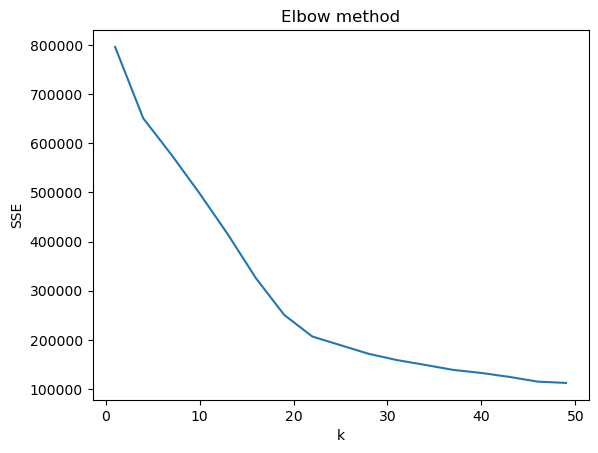

In [11]:
# plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow method')
plt.show()

In [12]:
# create a KMeans model with 3 clusters
model = KMeans(n_clusters=22, random_state=42).fit(X_scaled)

In [13]:
# calculate predicted values
y_pred = model.predict(X_scaled)
y_pred

array([17,  4,  5, ...,  8,  1,  4], dtype=int32)

In [14]:
# make a df for the 3 clusters
df_y = pd.DataFrame(y_pred, columns=['Cluster'])
df_y

Cluster
0           17
1            4
2            5
3            1
4            2
...        ...
29477        0
29478        4
29479        8
29480        1
29481        4

[29482 rows x 1 columns]

In [15]:
# Add prediected values onto the original dataframe
combined = df.join(df_y, how='inner')
combined

Age of sample adult  Sex of sample adult  Education of sample adult  \
0                      5.0                    1                          1   
1                      5.3                    1                          7   
2                      5.6                    1                          8   
3                      5.7                    2                          5   
4                      2.5                    1                          4   
...                    ...                  ...                        ...   
29477                  7.0                    2                          9   
29478                  3.5                    2                          7   
29479                  7.2                    2                          4   
29480                  5.8                    1                          5   
29481                  5.7                    2                          4   

       Ever had Diabetes?  Categorical Body Mass Index  \
0                       2                            3   
1                       1                            3   
2                       2                            3   
3                       2                            4   
4                       2                            4   
...                   ...                          ...   
29477                   2                            3   
29478                   1                            4   
29479                   2                            3   
29480                   2                            2   
29481                   1                            4   

       SA family poverty ratio  Cluster  
0                         1.93       17  
1                         4.45        4  
2                         5.94        5  
3                         3.70        1  
4                         1.66        2  
...                        ...      ...  
29477                     5.11        0  
29478                     3.03        4  
29479                     2.07        8  
29480                     2.05        1  
29481                     4.89        4  

[29482 rows x 7 columns]

### test 2 principal components

In [17]:
# initiate, fit a pca=2 model
pca2 = PCA(n_components=2)
data_pca2 = pca2.fit_transform(X_scaled)
data_pca2

array([[ 0.42915073,  1.66542387],
       [ 3.54238481,  1.62797903],
       [-0.74587269,  2.20136261],
       ...,
       [ 0.16549489, -0.82223812],
       [-0.44776944,  0.83716909],
       [ 4.07590493, -1.50446687]])

In [18]:
# make the df
df_pca2 = pd.DataFrame(
    data=data_pca2, columns=['pc1', 'pc2'])
df_pca2

pc1       pc2
0      0.429151  1.665424
1      3.542385  1.627979
2     -0.745873  2.201363
3      0.232956 -1.493186
4      0.520518  1.205391
...         ...       ...
29477 -0.815376 -0.603717
29478  3.734382 -1.691189
29479  0.165495 -0.822238
29480 -0.447769  0.837169
29481  4.075905 -1.504467

[29482 rows x 2 columns]

In [19]:
# add pc into a column to the df
df_pca2['class'] = model.labels_
df_pca2

pc1       pc2  class
0      0.429151  1.665424     17
1      3.542385  1.627979      4
2     -0.745873  2.201363      5
3      0.232956 -1.493186      1
4      0.520518  1.205391      2
...         ...       ...    ...
29477 -0.815376 -0.603717      0
29478  3.734382 -1.691189      4
29479  0.165495 -0.822238      8
29480 -0.447769  0.837169      1
29481  4.075905 -1.504467      4

[29482 rows x 3 columns]

In [21]:
pca2.explained_variance_ratio_

array([0.08548004, 0.07873844])

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

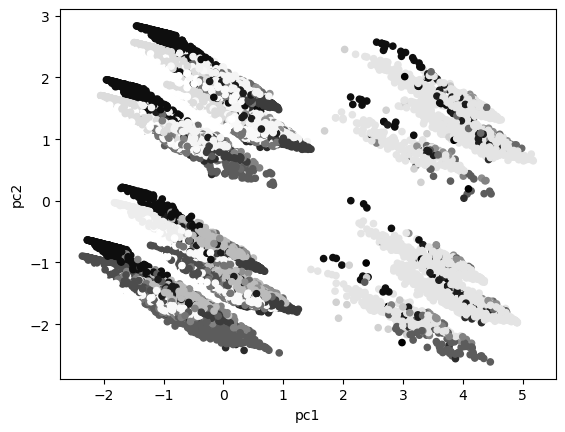

In [23]:
# plot
df_pca2.plot(x='pc1', y='pc2', kind='scatter', c=df_pca2['class'])

### test 3 principal components

In [25]:
pca3 = PCA(n_components=3)

data_pca3 = pca3.fit_transform(X_scaled)
data_pca3

array([[ 0.43800698,  1.68283484,  0.7109352 ],
       [ 3.57725377,  1.55826142, -2.07632859],
       [-0.74306622,  2.22799574, -0.53595305],
       ...,
       [ 0.15421035, -0.8562635 ,  1.20168763],
       [-0.42506948,  0.85172448,  0.2544257 ],
       [ 4.06247747, -1.5739197 , -0.57202369]])

In [26]:
df_pca3 = pd.DataFrame(
    data=data_pca3, columns=['pc1', 'pc2', 'pc3'] )
df_pca3

pc1       pc2       pc3
0      0.438007  1.682835  0.710935
1      3.577254  1.558261 -2.076329
2     -0.743066  2.227996 -0.535953
3      0.232158 -1.419426  1.007526
4      0.556178  1.122088  2.453877
...         ...       ...       ...
29477 -0.861820 -0.535030 -0.900589
29478  3.765184 -1.757641 -1.355045
29479  0.154210 -0.856264  1.201688
29480 -0.425069  0.851724  0.254426
29481  4.062477 -1.573920 -0.572024

[29482 rows x 3 columns]

In [27]:
df_pca3['class'] = model.labels_
df_pca3

pc1       pc2       pc3  class
0      0.438007  1.682835  0.710935     17
1      3.577254  1.558261 -2.076329      4
2     -0.743066  2.227996 -0.535953      5
3      0.232158 -1.419426  1.007526      1
4      0.556178  1.122088  2.453877      2
...         ...       ...       ...    ...
29477 -0.861820 -0.535030 -0.900589      0
29478  3.765184 -1.757641 -1.355045      4
29479  0.154210 -0.856264  1.201688      8
29480 -0.425069  0.851724  0.254426      1
29481  4.062477 -1.573920 -0.572024      4

[29482 rows x 4 columns]

In [28]:
pca3.explained_variance_ratio_

array([0.08545709, 0.07864988, 0.05673497])

In [30]:
# plot 
import plotly.express as px
fig = px.scatter_3d(
    df_pca3,
    x='pc1',
    y='pc2',
    z='pc3',
    symbol='class',
    color = 'class',
    width=800,
)
fig.show()